# Input-文本输入

In [2]:
from pywebio.input import *
from pywebio.output import *
import json

In [2]:
# validate
def check_age(age):
    if age>30:
        return 'Too old'
    elif age<10:
        return 'Too young'
input('Input your age', type=NUMBER, validate=check_age)

23

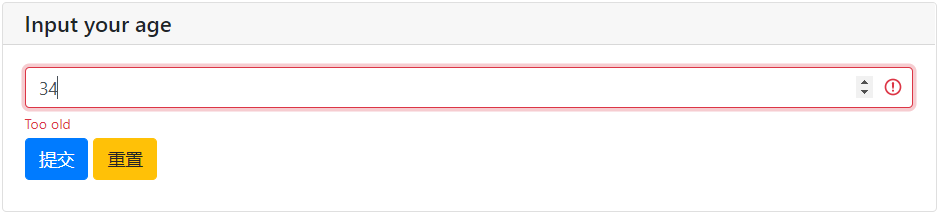
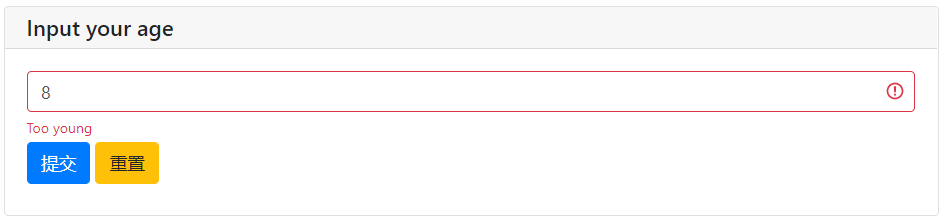

In [3]:
input('Input your age', value="请输入你的年龄")

'13'

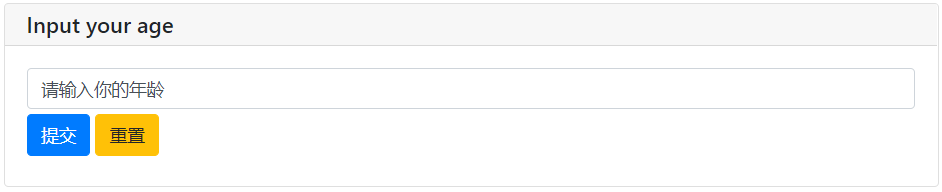

In [3]:
# 单击事件
import time
def set_now_ts(set_value):
    set_value(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

ts = input('Timestamp', type=TEXT, action=('Now', set_now_ts))
print(ts)

2021-11-25 16:57:36


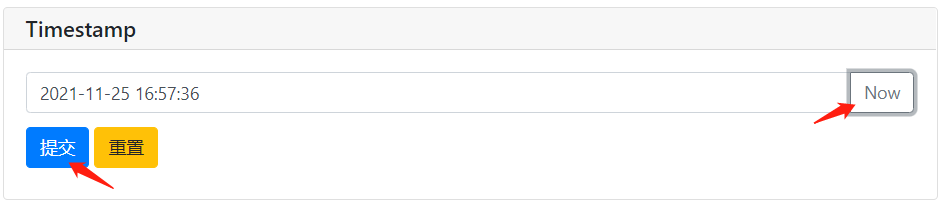

In [ ]:
import time
def set_now_ts(set_value):
    set_value(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

ts = input('Timestamp', type=TEXT, action=('Now', set_now_ts), placeholder = "点击右边就能看到现在时间哦~", help_text = "小鲁班,哒哒哒")

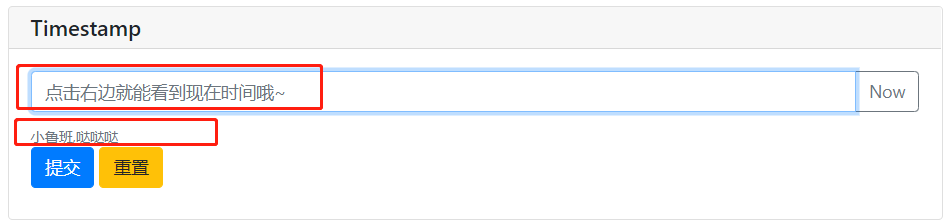

# textarea-多行文本输入

In [2]:
res = textarea('Text area', code={
    'mode': "python",
    'theme': 'darcula'
})

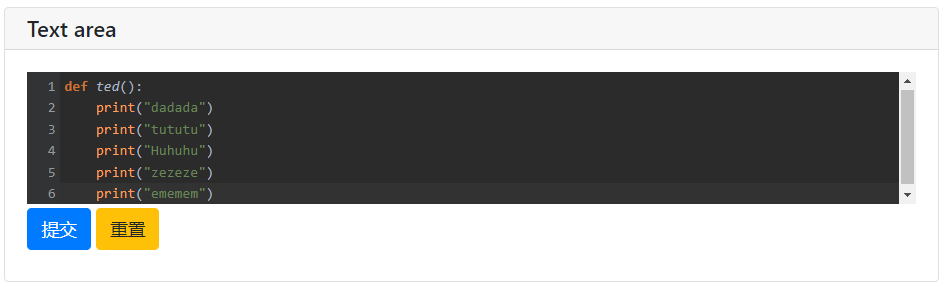

# select 下拉选择框

In [5]:
# 单选-列表
sel = select("看你的选择：", ["A","B"])

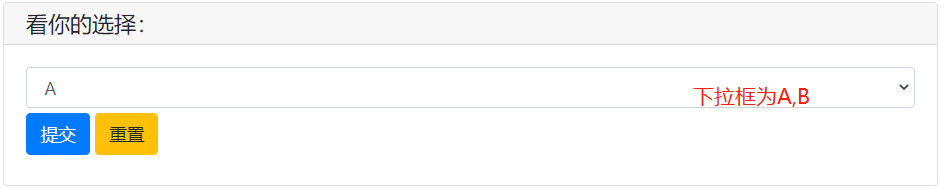

In [4]:
#列表
#sel = select(label="dda",options=[['dd','dd',False,True],['ee','ee',False,False],['ff','ff',True,True]])
#元祖
#sel = select(label="dda",options=[('dd','dd',True,True),('ee','ee',False,False),('ff','ff',False,True)])
#字典
sel = select(label="dda",options=[{"label":'dd',"value":'dd',"selected":True,"disabled":True},{"label":'ee',"value":'ee',"selected":False,"disabled":False},{"label":'ff',"value":'ff',"selected":False,"disabled":True}])

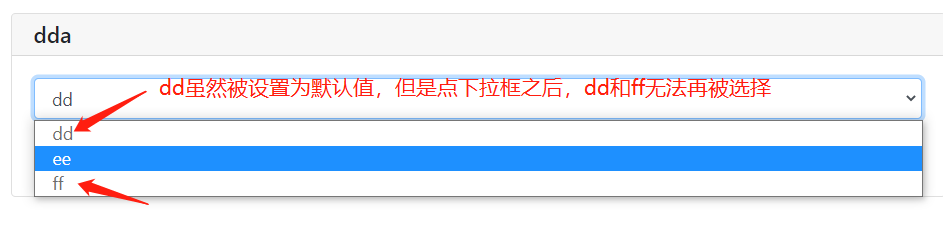

In [6]:
# 多选-列表
sel = select("我是多选：", ["A","B","C"], multiple=True, value=["A","B"])

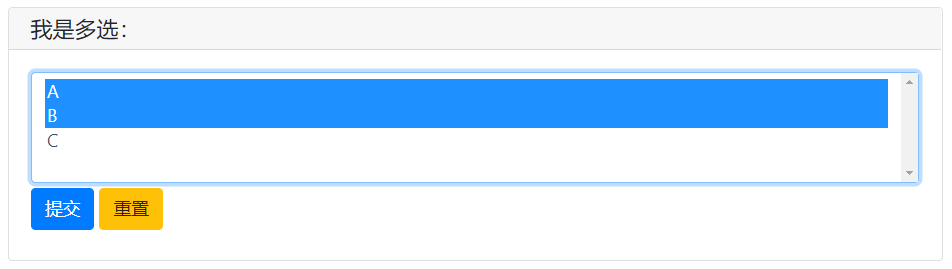

# checkbox 勾选选项

In [2]:
#可以多选，也可以不选，返回的是一个列表
check = checkbox("请大佬选择：",["小鲁班","小背包","哒哒哒","小火箭"])
print(check)

[]


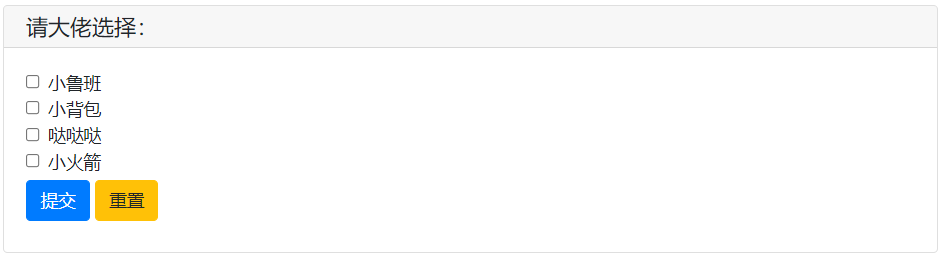

In [3]:
check = checkbox("请大佬选择：",["小鲁班","小背包","哒哒哒","小火箭"],inline=True,value=['小鲁班'])

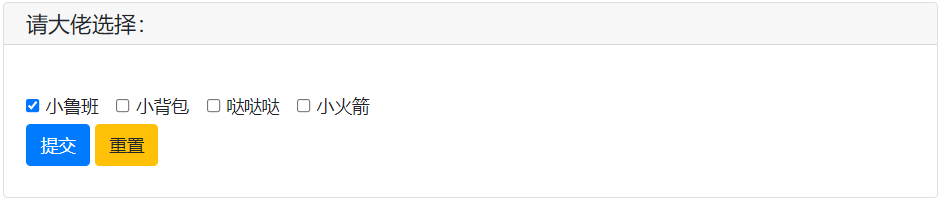

# radio 单选选项

In [4]:
radio("请大佬选择：",["小鲁班","小背包","哒哒哒","小火箭"],inline=True,value=['小背包'])

'小背包'

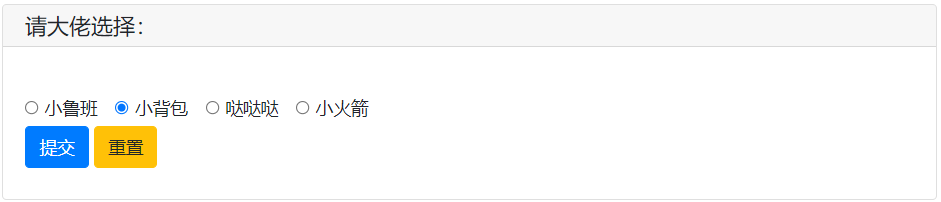

# actions 按钮选项

In [10]:
# 简单的操作
confirm = actions('Confirm to delete file?', ['confirm', 'cancel'],
                      help_text='Unrecoverable after file deletion')
put_markdown('You clicked the `%s` button' % confirm).show() 

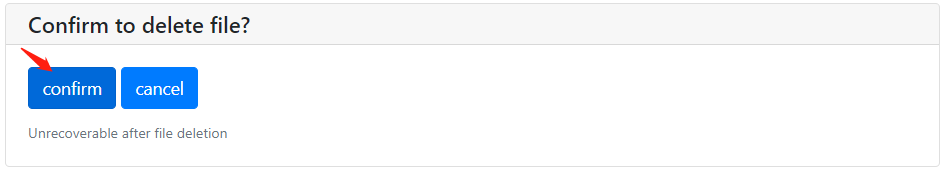
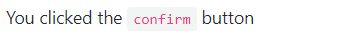

In [4]:
# 替换默认的提交按钮
# 若 type='reset'/'cancel' 或 disabled=True 可省略 value
info = input_group('Add user', [
    input('username', type=TEXT, name='username', required=True),
    input('password', type=PASSWORD, name='password', required=True),
    actions('actions', [
        {'label': 'Save', 'value': 'save'},
        {'label': 'Save and add next', 'value': 'save_and_continue'},
        {'label': 'Reset', 'type': 'reset', 'color': 'warning'},
        {'label': 'Cancel', 'type': 'cancel', 'color': 'danger'},
    ], name='action', help_text='actions'),
])
put_code('info = ' + json.dumps(info, indent=4))
if info is not None:
    #save_user(info['username'], info['password'])  
    if info['action'] == 'save_and_continue':
        add_next()  

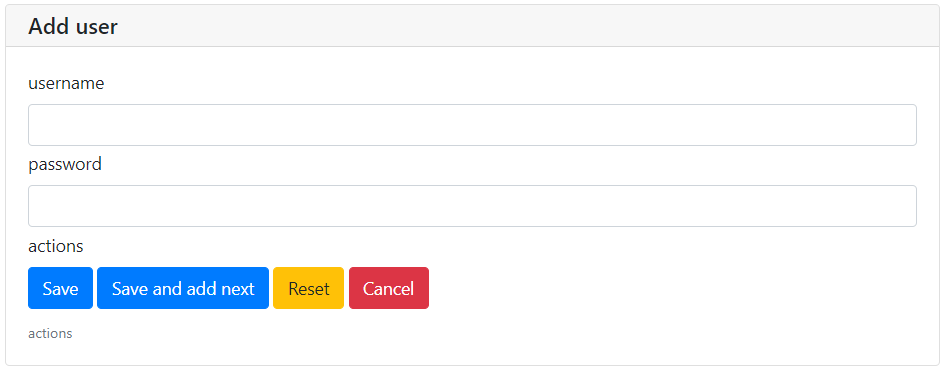

# slider 滑块输入

In [3]:
slider(label="请选择数值：",value=5, min_value=1, max_value=100, step=1)

23

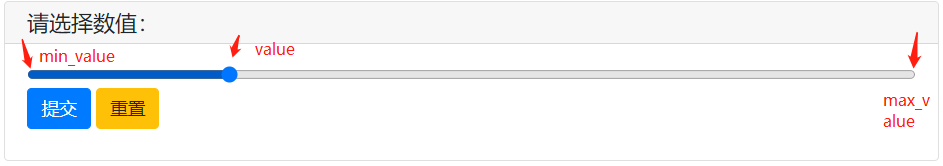

# file_upload 文件上传

In [3]:
#Upload a txt file，utf-8 format
txtFile = file_upload("Select some txtFile:")

with open(txtFile['filename'],'r',encoding='utf-8') as FA:
    for line in FA:
        print(line)

我是小鲁班

有本事你打我。


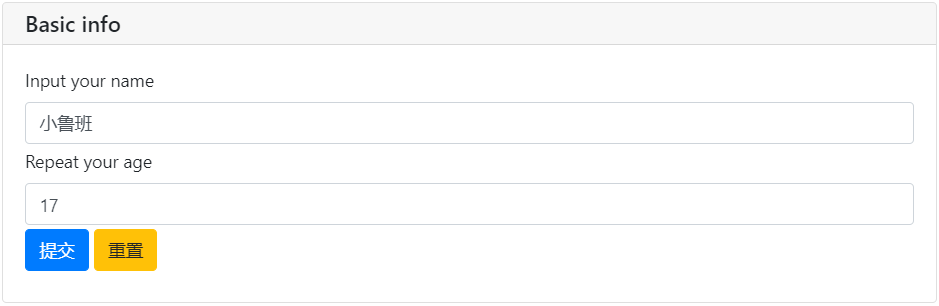

In [4]:
#Upload xlsx file ，use pandas
import pandas as pd
xlsxFile = file_upload("Select some xlsxFile:")
data = pd.read_excel(xlsxFile['filename'])
print(data)

     sample_id     sample_name  dedup_rate
0           40  NY200110375677   83.019632
1           42  NY200113332437   85.200889
2           41  NY200113145434   86.479412
3           46  NY200113417371   77.675061
4           45  NY200113143818   75.827790
..         ...             ...         ...
178        280  NY200113342559   82.890792
179        284  NY191124020459   83.147656
180        285  NY200113225579   81.154505
181        286  NY200729904794   79.419813
182        287  NY200110424631   82.255647

[183 rows x 3 columns]


In [4]:
# Upload a file and save to server                      
f = file_upload("Upload a image")                  
open(f['filename'], 'wb').write(f['content'])  

imgs = file_upload("Select some pictures:", accept="image/*", multiple=True)
for img in imgs:
    put_image(img['content'])

# input_group 输入组

In [7]:
def check_form(data):
    if len(data['name']) > 6:
        return ('name', 'Name to long!')
    if data['age'] <= 0:
        return ('age', 'Age cannot be negative!')

data = input_group("Basic info",[
    input('Input your name', name='name'),
    input('Repeat your age', name='age', type=NUMBER)
], validate=check_form)

print(data)

{'name': '小鲁班', 'age': 17}


# input_update 更新输入项的属性

In [3]:
country2city = {
    'China': ['Beijing', 'Shanghai', 'Hong Kong'],
    'USA': ['New York', 'Los Angeles', 'San Francisco'],
}
countries = list(country2city.keys())
location = input_group("Select a location", [
    select('Country', options=countries, name='country',
           onchange=lambda c: input_update('city', options=country2city[c])),
    select('City', options=country2city[countries[0]], name='city'),
])
print(location)

{'country': 'China', 'city': 'Beijing'}


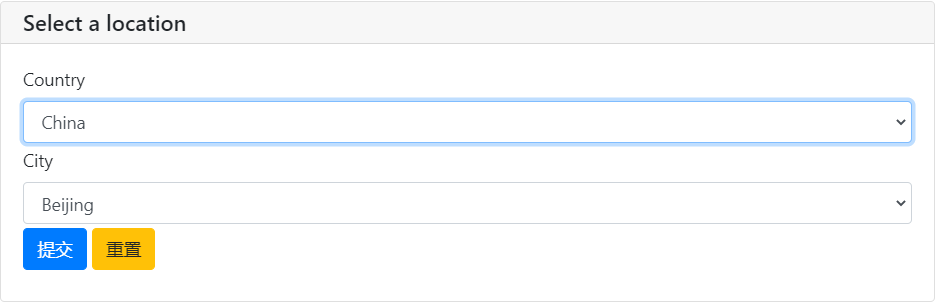